In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys
sys.path.append("../")
sys.path.append("../py")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
import logging

In [7]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [8]:
# top folder where all sims are stored
SERVERFOLDER = os.path.join(cfg.path.server, r'conicalNozzle')

# folder where summary tables, figures should be exported
EXPORTFOLDER = os.path.join(cfg.path.fig, 'conicalNozzle', 'plots')

# folders where sims are stored
TOPFOLDERS = [os.path.join(SERVERFOLDER, s) for s in ['HB_angle', 'HB_diameter', 'HB_k', 'HB_speed', 'newt_angle', 'newt_diameter', 'newt_visc']]

# Generating Files

#### generate table of metadata for all folders

In [ ]:
import pandas as pd
o = []
for topfolder in TOPFOLDERS:
    for f in fp.caseFolders(topfolder):
        try:
            fs.populate(f)
        except Exception as e:
            print(f)
            raise e
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
fn = os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_general.csv')
p.to_csv(fn)
logging.info(f'Exported {fn}')

#### summarize data for each folder

In [ ]:
for topfolder in TOPFOLDERS:
    for folder in fp.caseFolders(topfolder):
        df, u = intm.importSS(folder)
        if len(df)>0:
            dftimes = df.time.unique()
            files = os.listdir(os.path.join(folder, 'interfacePoints'))
            if len(dftimes)<len(files):
                intm.sumAndSteady(folder, True)

# Plots

### nozzle angle, bath size

In [9]:
help(withinNozzle0)

Help on function withinNozzle0 in module plot_survival:

withinNozzle0(topFolder: str, exportFolder: str, time: float, zabove, zunits: str = 'mm', cvar: str = 'nozzle_angle', overwrite: bool = False, export: bool = True, fontsize: int = 8, **kwargs)
    plots line traces within the nozzle at a given z position and time. 
    topfolder is the folder holding the simulations. you can filter the folder using **kwargs, as described in plot_general.listTPvalues
    exportFolder is the folder to export figures to
    time is the time at which to collect the stress
    zabove is the z position relative to the bottom of the nozzle, in units of zunits
    zunits is 'mm' or any parameter in legend, e.g. 'nozzle_inner_width'
    cvar is the variable to color by
    overwrite True to overwrite existing files
    export True to export figures



In [ ]:
withinNozzle0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, -2
              , zunits='nozzle_inner_width'
              , bath_depth_list=[6.05], overwrite=True
              , volume=False, xvar='rbar')

In [11]:
help(XSPlots0)

Help on function XSPlots0 in module plot_slices:

XSPlots0(topFolder: str, exportFolder: str, time: float, xbehind: float, xunits: str = 'mm', overwrite: bool = False, dx: float = 0.5, **kwargs) -> None
    plot all cross-sections together
    topFolder is the folder that holds all the files
    time is the time at which to take the cross-section
    xbehind is the distance behind the center of the nozzle to take the cross-section
    xunits is 'mm' or 'nozzle_inner_width'
    overwrite True to overwrite values
    dx is the spacing between cross-sections, in mm



In [ ]:
XSPlots0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', 
         bath_depth_list=[6.05], cvar='nozzle_angle', 
         xvar='nozzle_angle', yvar='bath_depth', overwrite=True)

In [12]:
help(survivalRMultiRow)

Help on function survivalRMultiRow in module plot_survival:

survivalRMultiRow(topFolder: str, exportFolder: str, fontsize: int = 8, export: bool = True, overwrite: bool = False, **kwargs)
    plot cell survival as a function of radius, at three weights of the equation



In [ ]:
survivalRMultiRow(TOPFOLDERS[0], EXPORTFOLDER, 
                  cvar='nozzle_angle', bath_depth_list=[6.05]
                  , overwrite=True, volume=False)

In [13]:
help(survivalPlot)

Help on function survivalPlot in module plot_survival:

survivalPlot(folder: str, exportFolder: str, xvar: str, time: float = 2.5, a: float = 0.001, b: float = 0.5, c: float = 0.5, zunits: str = 'nozzle_inner_width', fontsize: int = 8, dr: float = 0.05, export: bool = True, overwrite: bool = False, **kwargs)
    plot survival as a function of z position, relative radius, or get a single value.
    folder is the simulation folder
    exportFolder is the folder to export results to
    xvar is the variable on the x axis. value of xvar should be 'z', 't', 'rbar', or 'scalar' 
    time is the time at which we evaluate survival
    a,b, and c are model parameters for the cell survival
    zunits = mm or nozzle_inner_width
    dr is the spacing between relative r values, as a fraction
    export True to export images
    overwrite True to export images even if the file already exists



INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\HB_angle\survival_z_cn137_0.01_0.5_0.5_nozzle_inner_width_volume_HB_angle_xhalf_True_ylims_[]-[0, 80]-[]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\HB_angle\survival_z_cn137_0.01_0.5_0.5_nozzle_inner_width_slice_HB_angle_xhalf_True_ylims_[]-[0, 80]-[]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\HB_angle\survival_z_cn137_0.01_0.5_0.5_nozzle_inner_width_volume_HB_angle_xhalf_False_ylims_[]-[0, 80]-[]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\HB_angle\survival_z_cn137_0.01_0.5_0.5_nozzle_inner_width_slice_HB_angle_xhalf_False_ylims_[]-[0, 80]-[]


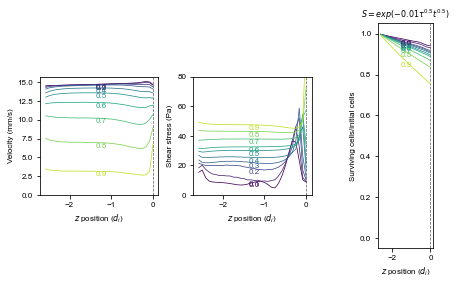

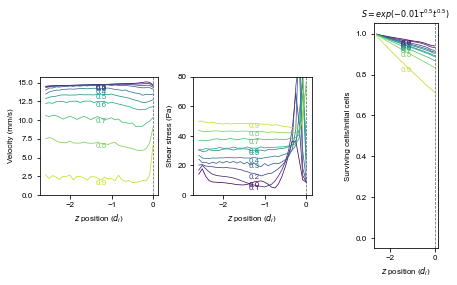

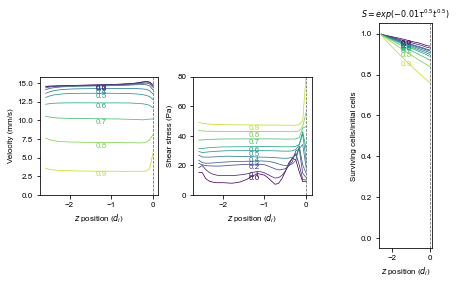

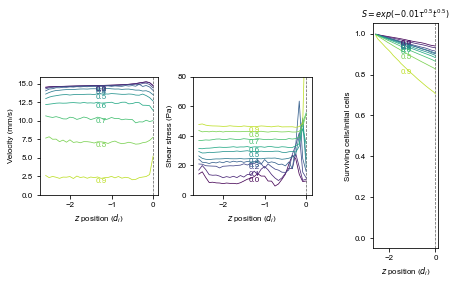

In [12]:
for xhalf in [True, False]:
    for v in [True, False]:
        for s in [137]:
            folder = os.path.join(SERVERFOLDER, 'HB_angle', f'cn{s}')
            for d in [{'a':10**-2, 'b':0.5, 'c':0.5}]:
                survivalPlot(folder, EXPORTFOLDER, 'z',  a=d['a'], b=d['b'], c=d['c']
                             , dr=0.1, volume=v, xhalf=xhalf, export=True, overwrite=True, ylims=[[],[0,80], []])

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_angle')
linePlots0(topfolder, EXPORTFOLDER, 'nozzle_angle', 2.5, imsize=6.5, yvar=['vz', 'vx', 'nu'], 
           x=1.4, bath_depth_list=[6.05], nozzle_angle_list=[0,10,20,30], export=True, overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_angle')
# for s in ['a_stre', 'x_viscx', 'y_viscy', 'y_umag']:
for s in ['y_shearStressy']:
    picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag=s
              , overwrite=True, xvar='nozzle_angle', yvar='bath_depth'
          , bath_depth_list=[6.05], nozzle_angle_list=[0,10,20,30], imsize=8)

In [ ]:
fig,axs = plt.subplots(1,3, figsize=(6.5, 3.25))
f = os.path.join(SERVERFOLDER, 'HB_angle', 'cn137')
twlist = [0.1, 0.2, 0.3, 0.4, 0.5]
cm = sns.color_palette('viridis', n_colors=len(twlist))
for i,tw in enumerate(twlist):
    dlist = []
    for di in np.arange(0.1, 1, 0.05):
        do = di+2*tw
        d = intm.viscRatio(f, di=di, do=do)   # get the viscosity ratio
        d['di'] = di  # get the color
        d['do'] = do
        dlist.append(d)   # save these values to list
    df = pd.DataFrame(dlist)
    axs[0].plot(df['di'], df['ink_visc'], label=tw, color=cm[i])
    axs[1].plot(df['di'], df['sup_visc'], label=tw, color=cm[i])
    axs[2].plot(df['di'], df['viscRatio'], label=tw, color=cm[i])

    
axs[0].legend(title='$t_w$ (mm)')
axs[0].set_ylabel('Ink viscosity (Pa$\cdot$s)')
axs[1].set_ylabel('Support viscosity (Pa$\cdot$s)')
for ax in [axs[0], axs[1]]:
    ax.set_ylim([0.4, 3.5])
axs[2].set_ylabel('Ink viscosity/support viscosity')
for ax in axs:
    ax.set_xlabel('$d_i$ (mm)')
    setSquare(ax)
fig.tight_layout()
intm.exportIm(os.path.join(EXPORTFOLDER, 'viscRatio_d.pdf'), fig)

### speed

In [ ]:
for na in [0, 15]:
    withinNozzle0(os.path.join(SERVERFOLDER, 'HB_speed'), EXPORTFOLDER, 2.5, 2
              , zunits='nozzle_inner_width', 
              cvar='vsup', overwrite=True 
              , xvar='rbar', volume=False
              , vsup_list=[5, 7.5, 10, 12.5, 15]
             , nozzle_angle_list=[na])

In [ ]:
txtPlots0(os.path.join(SERVERFOLDER, 'HB_speed'), EXPORTFOLDER
         , xunits='nozzle_inner_width', 
         cvar='vsup', xvar='vsup', yvar='nozzle_angle',
         vsup_list=[5, 7.5, 10, 12.5, 15], overwrite=True, fontsize=20)

In [ ]:
XSPlots0(os.path.join(SERVERFOLDER, 'HB_speed'), EXPORTFOLDER, 2.5, 8
         , xunits='nozzle_inner_width', 
         cvar='vsup', xvar='vsup', yvar='nozzle_angle',
         vsup_list=[5, 7.5, 10, 12.5, 15], overwrite=True)

In [ ]:
for na in [0,15]:
    survivalRMultiRow(os.path.join(SERVERFOLDER, 'HB_speed'), EXPORTFOLDER, cvar='vsup'
                  , volume=False
                  , vsup_list=[5, 7.5, 10, 12.5, 15]
                  , nozzle_angle_list=[na], overwrite=True)

In [ ]:
picPlots0(os.path.join(SERVERFOLDER, 'HB_speed'), EXPORTFOLDER, 2.5, 0
          , tag='y_shearStressy', overwrite=True, xvar='vsup', yvar='nozzle_angle'
          , vsup_list=[5, 7.5, 10, 12.5, 15])

In [ ]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'HB_speed'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width', yvar='aspectratio', cvar='vsup', mvar='nozzle_angle'
              , overwrite=True, export=True, vsup_list=[5, 7.5, 10, 12.5, 15])

### diameter

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
for na in [0, 15]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , xvar='rbar', volume=False
                  , nozzle_angle_list=[na], overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='vink', nozzle_angle_list=[0],  overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='vink', bn_list=['cn209', 'cn208', 'cn137', 'cn226']
         , yvar='vink', nozzle_angle_list=[0],  overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='ink_k', bn_list=['cn254', 'cn253', 'cn137', 'cn252']
         , yvar='ink_k', nozzle_angle_list=[0],  overwrite=True)

In [ ]:
for f in ['cn209', 'cn208', 'cn137', 'cn226']:
    stabilityPlot(os.path.join(SERVERFOLDER, 'HB_diameter', f), EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', export=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
txtPlots0(topfolder, EXPORTFOLDER, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='vink', nozzle_angle_list=[0], overwrite=True, fontsize=20)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
txtPlots0(topfolder, EXPORTFOLDER, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='nozzle_angle', vsup_list=[10], overwrite=True, fontsize=20)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='vink', nozzle_angle_list=[0], overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
for s in ['y_umag', 'y_viscy', 'a_stre', 'y_py', 'x_viscx']:
    picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag=s, overwrite=True, supv_list=[10]
          , xvar='nozzle_inner_width', yvar='nozzle_angle')

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
for na in [0,15]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, cvar='nozzle_inner_width'
                  , nozzle_angle_list=[na], volume=False, overwrite=True, export=True)

In [ ]:
[metricVals(os.path.join(SERVERFOLDER, 'HB_diameter', s), 2.5, 8
           , ['aspectratio'], xunits='nozzle_inner_width') for s in ['cn208', 'cn209', 'cn226', 'cn137']]

In [1]:
0.7072309/0.6310286

1.1207588689324064

In [ ]:
l1 = [metricVals(os.path.join(SERVERFOLDER, 'HB_diameter', s), 2.5, 8
           , ['aspectratio'], xunits='nozzle_inner_width') for s in ['cn212', 'cn229']]
print(l1)
l1[1]['aspectratio']/l1[0]['aspectratio']

In [ ]:
for s in ['cn209', 'cn226']:
    xlist, ylist = shearStressCalcSlice(os.path.join(SERVERFOLDER, 'HB_diameter', s), 2.5, 'nozzle_inner_width')
    print(s, np.mean(ylist[0:20]))
(45.585-31.377)/45.585

In [ ]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'HB_diameter'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width'
               , yvar='aspectratio', cvar='nozzle_inner_width'
               , xvar='viscRatio', mvar='vsup', nozzle_angle_list=[0]
              , overwrite=True, export=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
linePlots0(topfolder, EXPORTFOLDER, 'nozzle_inner_width', 2.5
           , imsize=6.5, yvar=['vz', 'vx', 'nu'], 
           x=2, xunits='nozzle_inner_width', bn_list=['cn209', 'cn208', 'cn137', 'cn226'],
           zunits='nozzle_inner_width', nozzle_angle_list=[0], export=True, overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_diameter')
linePlots0(topfolder, EXPORTFOLDER, 'nozzle_inner_width', 2.5
           , imsize=6.5, yvar=['vz', 'vx', 'nu'], 
           x=2, xunits='nozzle_inner_width', bn_list=['cn254', 'cn253', 'cn137', 'cn252'],
           zunits='nozzle_inner_width', nozzle_angle_list=[0], export=True, overwrite=True)

In [ ]:
picPlots0(os.path.join(SERVERFOLDER, 'HB_diameter'), EXPORTFOLDER, 2.5, 0
          , tag='y_shearStressy', overwrite=True, 
          cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='nozzle_angle', vsup_list=[10])

### newtonian diameter

In [ ]:
extractTP(os.path.join(SERVERFOLDER, 'newt_diameter', 'cn255'))

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , xvar='rbar', volume=False, vink_list=[10]
                  , overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , xvar='rbar', volume=False, vink_list=[10]
                  , overwrite=True)

In [ ]:
txtPlots0(os.path.join(SERVERFOLDER, 'newt_diameter'), EXPORTFOLDER, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='vink', overwrite=True, fontsize=20)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nuink', bn_list=['cn243', 'cn242', 'cn200', 'cn255']
         , yvar='nuink', overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nuink', bn_list=['cn248', 'cn247', 'cn200', 'cn244']
         , yvar='nuink', overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width', vink_list=[10]
         , yvar='vink', overwrite=True)

In [ ]:
picPlots0(os.path.join(SERVERFOLDER, 'newt_diameter'), EXPORTFOLDER, 2.5, 0
          , tag='y_shearStressy', cvar='nozzle_inner_width'
          , xvar='nozzle_inner_width', vink_list=[10]
         , yvar='vink', overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
kwargs = {'ylims':[[0, 2100], [0, 3100], [0, 21]], 'export':True, 'overwrite':True}
analyticalPlot(topfolder, EXPORTFOLDER, [10], [0.26, 0.413, 0.603, 0.838], [10], [0], **kwargs)
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , xvar='rbar', volume=False
                  , vink_list=[10], **kwargs)

## newtonian

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_angle')
XSPlots0(topfolder, EXPORTFOLDER, 2.5 , 8, xunits='nozzle_inner_width'
         , cvar='nozzle_angle', xvar='nozzle_angle', yvar='nuink', overwrite=True
        , dy=0.7, dx=0.4)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_angle')
for nuink in [1,10]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_angle'
                  , xvar='rbar', volume=False, export=True
                  , nuink_list=[nuink], overwrite=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_angle')
kwargs = {'ylims':[[0,1000], [0,1400], [0,21]], 'export':True, 'overwrite':True}
analyticalPlot(topfolder, EXPORTFOLDER, [10], [0.603], [10], [0,5,10,15,20,25,30], **kwargs)
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_angle'
                  , xvar='rbar', volume=False
                  , nuink_list=[10], **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_angle')
for nuink in [1, 10]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, cvar='nozzle_angle', a3=10**-4, fontsize=8
                  , nuink_list=[nuink], volume=False, overwrite=True, export=True)

In [ ]:
kwargs = {'xvar':'nozzle_angle', 'nuink_list':[10] , 'nozzle_angle_list':[0,10,20,30]
          , 'export':True, 'overwrite':True}
topfolder = os.path.join(SERVERFOLDER, 'newt_angle')
picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag='a_stre', imsize=8, yvar='nuink',
               **kwargs)

In [ ]:
kwargs = {'xvar':'nozzle_angle'
          , 'nozzle_angle_list':[0,10,20,30], 'export':True, 'overwrite':True}

for s in ['newt_angle', 'HB_angle']:
    topfolder = os.path.join(SERVERFOLDER, s)
    if s=='newt_angle':
        kwargs['nuink_list']=[10]
    else:
        kwargs.pop('nuink_list')
        kwargs['bath_depth_list'] = [6.05]
    linePlots0(topfolder, EXPORTFOLDER, 'nozzle_angle', 2.5, imsize=6.5
           , yvar=['vz', 'vx', 'nu'], x=1.4, **kwargs)
    picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag='a_stre', imsize=8, yvar='ink_rho',
               **kwargs)

In [ ]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'newt_angle'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width'
               , yvar='aspectratio', cvar='nuink'
              , overwrite=True, export=True)

In [ ]:
picPlots0(os.path.join(SERVERFOLDER, 'newt_angle'), EXPORTFOLDER, 2.5, 0
          , tag='y_shearStressy', xvar='nozzle_angle'
          , yvar='nuink', cvar='nuink'
              , overwrite=True, export=True)

## viscosity (k)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

XSPlots0(topfolder, EXPORTFOLDER, 2.5 , 8, dx=0.5, **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

picPlots0(topfolder, EXPORTFOLDER, 2.5,0, 'y_shearStressy'
          , crops={'cropxl':200/1200, 'cropxr':500/1200, 'cropyt':400/1216, 'cropyb':650/1216}
          , **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

# for s in ['a_stre', 'y_viscy', 'x_viscx', 'y_py']:
for s in ['y_shearStressy']:
    picPlots0(topfolder, EXPORTFOLDER, 2.5,0, s
          , **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

txtPlots0(topfolder, EXPORTFOLDER,  **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_k')
kwargs = {'zunits':'nozzle_inner_width', 'cvar':'kink', 'xvar':'rbar', 
         'overwrite':True, 'export':True, 'volume':False, 'logy':True}
for nozzle_angle in [0,15]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, 2, nozzle_angle_list=[nozzle_angle], **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_k')
kwargs = {'zunits':'nozzle_inner_width', 'cvar':'kink',
         'overwrite':True, 'export':True, 'volume':False, 'logx':True, 'a3':10**-4}
for nozzle_angle in [0,15]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, nozzle_angle_list=[nozzle_angle], **kwargs)

In [ ]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'HB_k'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width'
               , yvar='aspectratio', cvar='ink_k'
              , overwrite=True, export=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':False}

txtPlots0(topfolder, EXPORTFOLDER, fontsize=12, **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'HB_k')
linePlots0(topfolder, EXPORTFOLDER, 'kink', 2.5, imsize=6.5
           , yvar=['vz', 'vx', 'nu'], 
           x=1.4, nozzle_angle_list=[0]
           , export=True, overwrite=True)

### Newtonian viscosity sweep

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_visc')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'nuink', 
          'cvar':'nuink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True, 'imsize':8}

XSPlots0(topfolder, EXPORTFOLDER, 2.5, 8, dx=0.4,  **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_visc')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'rbar',
          'cvar':'nuink', 'logy':True, 'zunits':'nozzle_inner_width',
         'overwrite':True, 'export':True, 'imsize':8, 'volume':False}
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, 2, **kwargs)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_visc')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'nuink', 'zunits':'nozzle_inner_width',
          'cvar':'nuink', 'yvar':'nozzle_angle', 'volume':False, 
         'overwrite':True, 'export':True, 'imsize':8, 'a3':10**-6, 'a2':10**-4, 'a1':1}
survivalRMultiRow(topfolder, EXPORTFOLDER, **kwargs)

In [ ]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'newt_visc'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width'
               , yvar='aspectratio', cvar='nuink'
              , overwrite=True, export=True)

In [ ]:
topfolder = os.path.join(SERVERFOLDER, 'newt_visc')
kwargs = {'ylims':[[5*10**0, 5*10**7], [10, 5*10**7], [0, 20]], 'export':True, 'overwrite':True, 'logy':True,
          'xunits':'nozzle_inner_width', 
          'cvar':'nuink',  
         'volume':False}
analyticalPlot(topfolder, EXPORTFOLDER, [10],[0.603],  [10**i for i in range(0,6)], [0], **kwargs)
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, 2, zunits='nozzle_inner_width', xvar='rbar', **kwargs)